#### **Quantum Explorers 2023**
---
# Time Traveler Badge - Quantum Error Correction & Mitigation Module
#### **Main Syllabus - Lab on Circuit Optimization**
This notebook is adapted from an exercise in [Qiskit Global Summer School 2022, Lab 1](https://learn.qiskit.org/summer-school/2022/lab-1)

#### Activity 1: Introduction to Error Mitigation through Circuit Optimization

We will be doing a simple circuit optimization exercise to get you into the swing of improving your quantum program results through techniques such as error mitigation! 

Quantum circuit optimization can be seen as a form of error mitigation, as the goal is to minimize the impact of errors in quantum computing. By reducing the number of gates, operations, and circuit depth in a quantum circuit, the algorithm can reduce the effect of errors caused by environmental noise and other factors. The optimization can also improve the performance and efficiency of quantum algorithms, making them more practical for real-world applications.

In this activity, we will be look at optimizing a circuit by reducing its depth. The depth of the circuit tells how many "layers" of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. More information about it can be found <u>[here](https://qiskit.org/documentation/apidoc/circuit.html#supplementary-information)</u>, especially the animation comparing it to Tetris can help to understand the concept of depth (open "Quantum Circuit Properties" to see it).

The more layers a quantum circuit has, the longer time the time to execute the circuit, which means there is more time for the qubits to decohere (i.e. lose their valuable quantum properties) and produce errors in results. So, we want to optimize this circuit to squeeze in as many gates as possible into as few circuit layers as possible to reduce its circuit execution time to produce better results which maintaining the same quantum logic. 

For this activity, we will be looking at a circuit that creates a Greenberger–Horne–Zeilinger (GHZ) state. Forgotten what the GHZ state is? A 3-qubit GHZ state is: 

In [1]:
#Import dependencies
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector


Depth:  3
Probabilities dict from statevector:  {'000': 0.5, '111': 0.5}


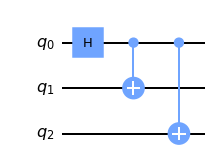

In [2]:
three_ghz = QuantumCircuit(3)
three_ghz.h(0)
three_ghz.cx(0,1)
three_ghz.cx(0,2) #alternativelya, you can use a cnot/cx gate here with qubit 1 (control) and qubit 2 (target)
depth = three_ghz.depth()
sv = Statevector.from_instruction(three_ghz).probabilities_dict(decimals=1)
print('Depth: ', depth)
print('Probabilities dict from statevector: ', sv)
three_ghz.draw('mpl')

The statevector resulting from these operations is: 

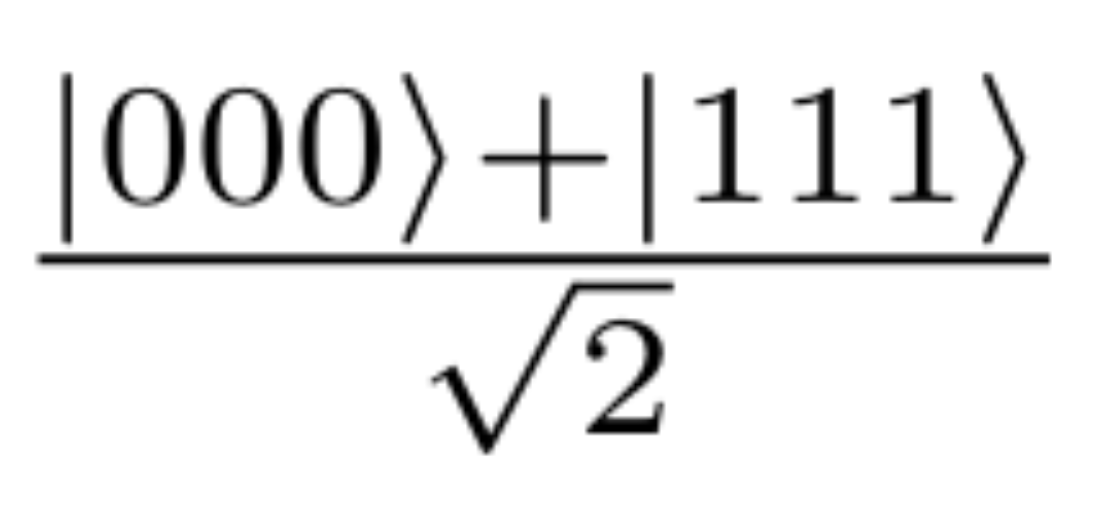

Upon measuring the circuit infinite times with a simulator or a perfect (non-noisy, error-free) quantum computer, you would obtain a probability distribution like so:

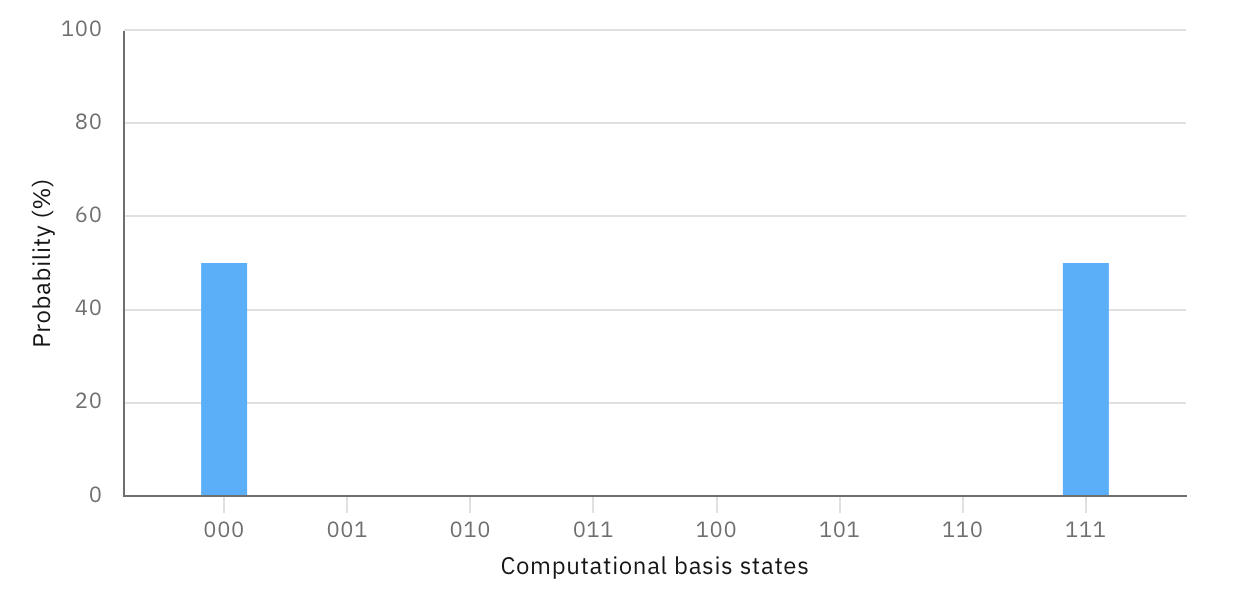

Let's take a look at the example of the naive implementation of a 16-qubit GHZ state:

Circuit depth:  16


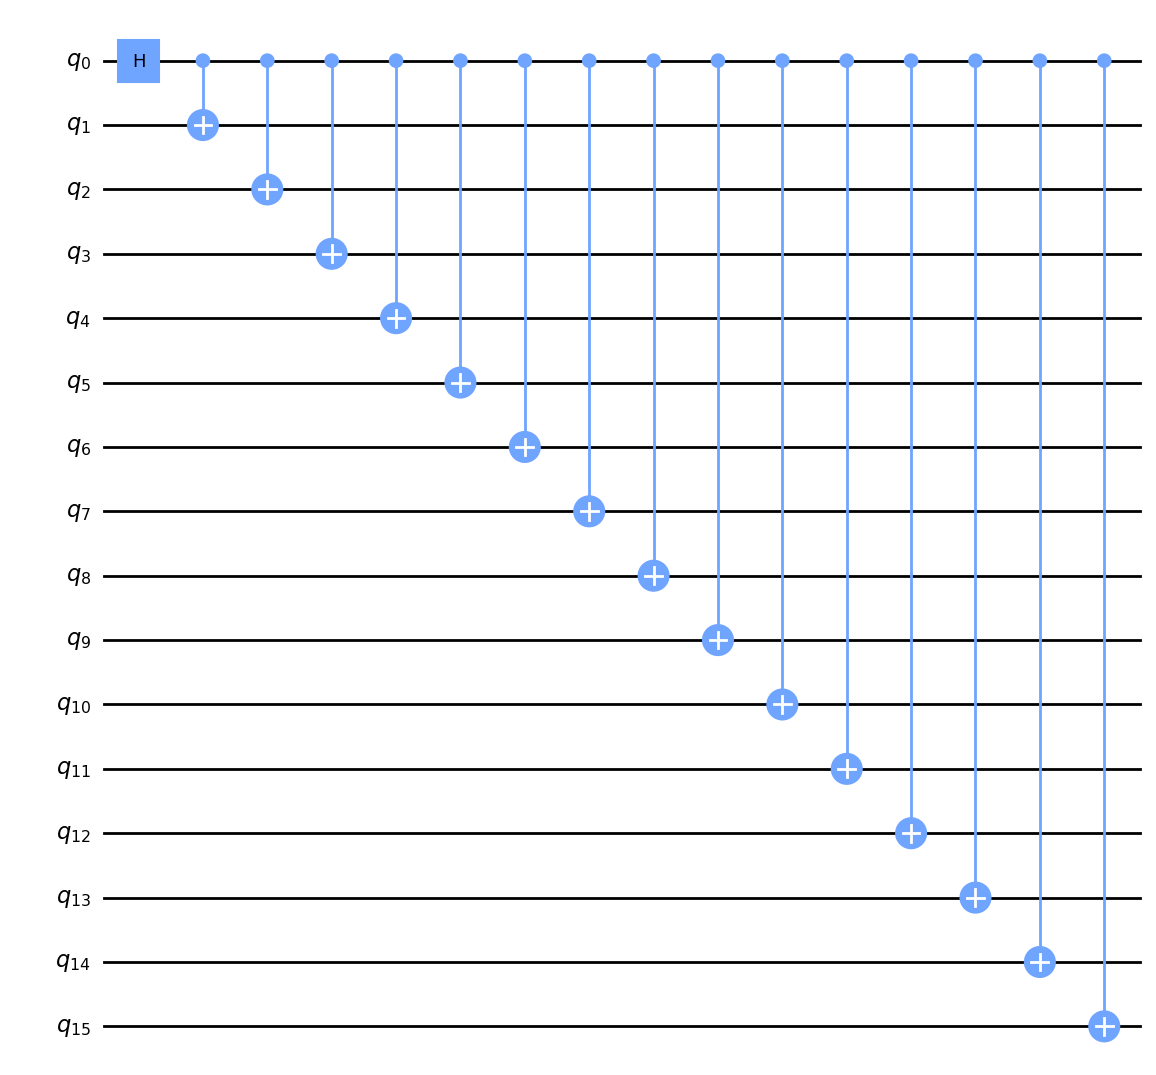

In [5]:
naive_qc = QuantumCircuit(16)

#Step 1: Preparing the first qubit in superposition
naive_qc.h(0)

#Step 2: Entangling all other qubits with it (1 is included 16 is exclude)
for x in range(1, 16):
    naive_qc.cx(0,x)

print('Circuit depth: ', naive_qc.depth())
naive_qc.draw('mpl')

As we can see the above quantum circuit has its depth equal to its number of gates. Step 1 adds a depth of 1 and step 2 adds a depth of 15. 

Let’s try to do this better! Its quite clear that we can’t do Step 1 better, but step 2 can be done a lot better. So lets try to find a solution, which only uses a depth of 4, instead of 15!

Hint: Lets think about what kind of asymptotic running time would cause only 4 operations. And don't forget that the final depth will be 5 (Step 1 and 2 combined).

**Activity: create a 16-qubit GHZ state while keeping the quantum circuit depth a maximum of 5 layers.** Tip: use the <u>[IBM Quantum Composer](https://quantum-computing.ibm.com/composer/files/new)</u> to play around with your circuit until you figure out a good strategy. 



In [ ]:
qc = QuantumCircuit(16)

### enter your code below ###

#Step 1: put your first chosen qubit into superposition - think outside the box!

#Step 2: use c-not gates to create a 16-qubit GHZ state with a circuit depth of 5.

#Do not put measurement gates on your circuit.
#Use the next code cell to check your circuit depth and state.

### enter your code above ###

qc.draw()


Run the next code cell. You should obtain a depth of `5` and the following probabilities dictionary:  
`{'0000000000000000': 0.5, '1111111111111111': 0.5}`

In [ ]:
#Ensure your quantum circuit is in the variable `qc` and no measurement gates have been added. 

depth = qc.depth()
grade_d = 'correct'
if depth != 5:
    grade_d = 'incorrect'

print("Depth is ", str(depth), f"- {grade_d}.")

s_prob = Statevector.from_instruction(qc).probabilities_dict(decimals=3)
grade_s = 'correct'
if s_prob != {'0000000000000000': 0.5, '1111111111111111': 0.5}:
    grade_s = 'incorrect'

print("The probabilities dict of your statevector is ", s_prob, f"- {grade_s}.")



Did you get it correct? Congratulations if you did!

Having some troubles finding the correct answer? Don't give up! Keep thinking outside of the box! 

The next code cell has the answer (coded out very explicitly) if you need some help. You can see that we have started by applying the hadamard gate onto a qubit in the middle of the circuit and created the entanglement outwards from this qubit while squeezing in as many cnot gates as possible into each layer. 

In [ ]:
#ANSWER AHEAD!

qc = QuantumCircuit(16)

qc.h(7) #use the middle qubit to easily create entanglement up and down the circuit. 
qc.cx(7,8)
qc.cx(7,6)
qc.cx(8,9)
qc.cx(6,4)
qc.cx(8,10)
qc.cx(9,11)
qc.cx(7,5)
qc.cx(8,12)
qc.cx(4,1)
qc.cx(5,2)
qc.cx(6,3)
qc.cx(9,13)
qc.cx(10,14)
qc.cx(11,15)
qc.cx(7,0)
    
print('Depth: ', qc.depth())
qc.draw()